In [ ]:
# !pip install matplotlib

In [4]:
import json

users = ["minh", "xiwen", "jingyu"]
apps = ["bookstack", "indico", "invoiceninja", "prestashop"]


def read_user_data(username):
    print(f"===== User: {username}")
    for app in apps:
        with open(f"data/splits/{username}/{app}.json", "r") as f:
            data = json.load(f)
            print(f"{app}: {len(data)} entries")

    print("-----")

    with open(f"data/splits/{username}/annotations.json", "r") as f:
        annotations = json.load(f)
        print(f"annotations: {len(annotations)} entries")

    with open(f"data/splits/{username}/labels.json", "r") as f:
        labels = json.load(f)
        print(f"labels: {len(labels)} entries")

    print()


for user in users:
    read_user_data(user)

===== User: minh
bookstack: 146 entries
indico: 183 entries
invoiceninja: 61 entries
prestashop: 628 entries
-----
annotations: 51 entries
labels: 34 entries

===== User: xiwen
bookstack: 145 entries
indico: 183 entries
invoiceninja: 61 entries
prestashop: 628 entries
-----
annotations: 0 entries
labels: 1 entries

===== User: jingyu
bookstack: 145 entries
indico: 183 entries
invoiceninja: 60 entries
prestashop: 628 entries
-----
annotations: 14 entries
labels: 10 entries



## Data analysis


minh: #annotations: 51 #labels: 139 #unique_labels: 34
xiwen: #annotations: 0 #labels: 0 #unique_labels: 0
jingyu: #annotations: 14 #labels: 42 #unique_labels: 10
All annotations: 181


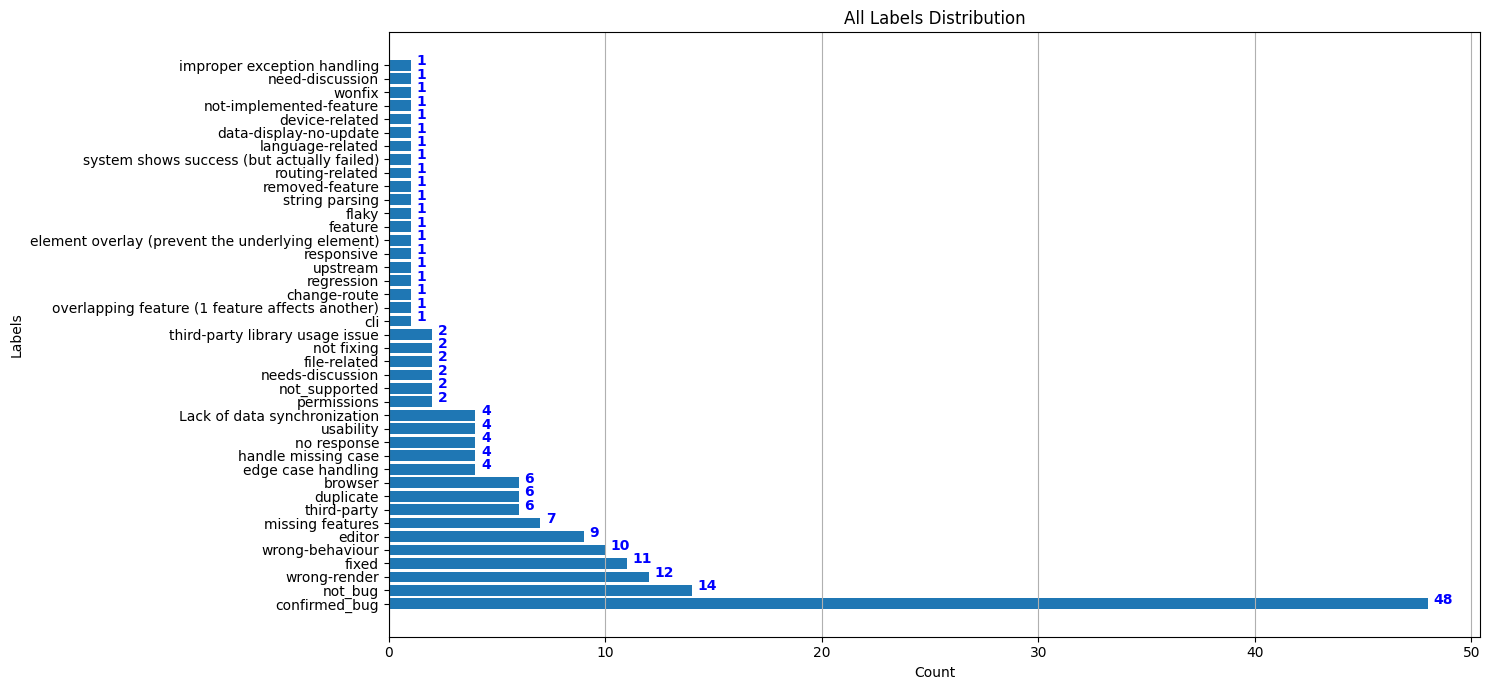

In [5]:
from matplotlib import pyplot as plt


# Load the annotations data and check
def get_all_assigned_labels(
    include_only_list: list[str] = [], exclude_list: list[str] = []
):
    all_assigned_labels = []
    for user in users:
        dir_name = f"./data/splits/{user}"
        with open(f"{dir_name}/annotations.json", "r") as f:
            annotations = json.load(f)

        labels = []
        for ann in annotations:
            annotated_labels = ann["annotations"]

            # Exclude records with certain labels
            if any(x in annotated_labels for x in exclude_list):
                continue

            # Include only -> only care about records with certain labels
            # print(include_only_list, [x in annotated_labels for x in include_only_list])
            if include_only_list:
                if any(x in annotated_labels for x in include_only_list):
                    labels += annotated_labels
                    continue
            else:
                labels += annotated_labels

        all_assigned_labels += labels

        print(
            f"{user}: #annotations: {len(annotations)} #labels: {len(labels)} #unique_labels: {len(set(labels))}"
        )

    print("All annotations:", len(all_assigned_labels))
    return all_assigned_labels


def plot_annotation_distribution(
    all_annotations: list[str], plot_name: str = "Label Distribution"
):
    from collections import Counter

    counter = Counter(all_annotations)
    labels, counts = zip(*counter.most_common())

    plt.figure(figsize=(15, 7))
    plt.barh(labels, counts)
    plt.xlabel("Count")
    plt.ylabel("Labels")
    # Show count on bars
    for i, v in enumerate(counts):
        plt.text(v + 0.25, i, str(v), color="blue", fontweight="bold")
    plt.title(plot_name)
    plt.grid(axis="x")
    plt.tight_layout()
    plt.show()


def analyse_single_label(label: str):
    related_annotations = get_all_assigned_labels(include_only_list=[label])
    print(len(related_annotations))
    plot_annotation_distribution(related_annotations, f"Distribution of label: {label}")


plot_annotation_distribution(get_all_assigned_labels(), "All Labels Distribution")

minh: #annotations: 51 #labels: 103 #unique_labels: 30
xiwen: #annotations: 0 #labels: 0 #unique_labels: 0
jingyu: #annotations: 0 #labels: 0 #unique_labels: 0
All annotations: 103


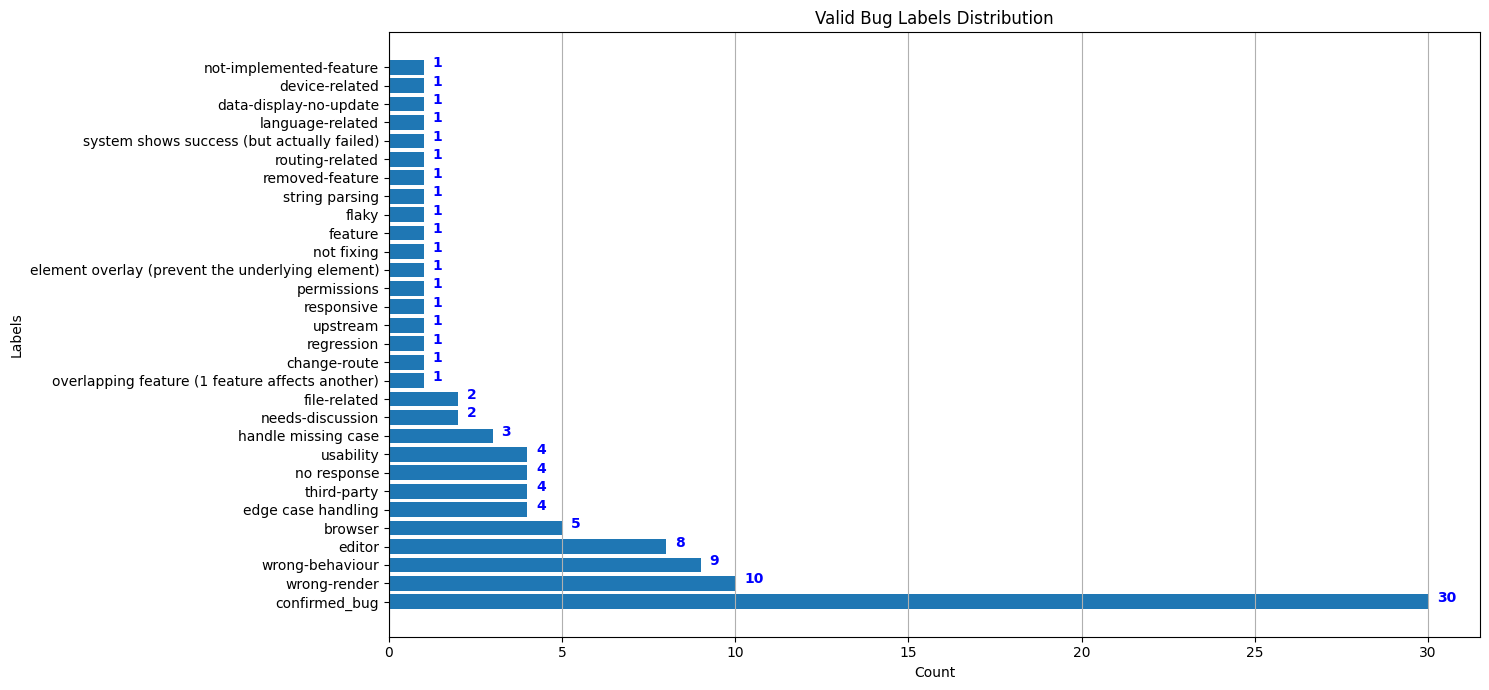

In [ ]:
# Number of duplicate bugs (both confirmed)
valid_bug_only_annotations = get_all_assigned_labels(
    exclude_list=["not_bug", "duplicate"]
)
plot_annotation_distribution(
    valid_bug_only_annotations, "Valid Bug Labels Distribution"
)

minh: #annotations: 51 #labels: 18 #unique_labels: 9
xiwen: #annotations: 0 #labels: 0 #unique_labels: 0
jingyu: #annotations: 0 #labels: 0 #unique_labels: 0
All annotations: 18
18


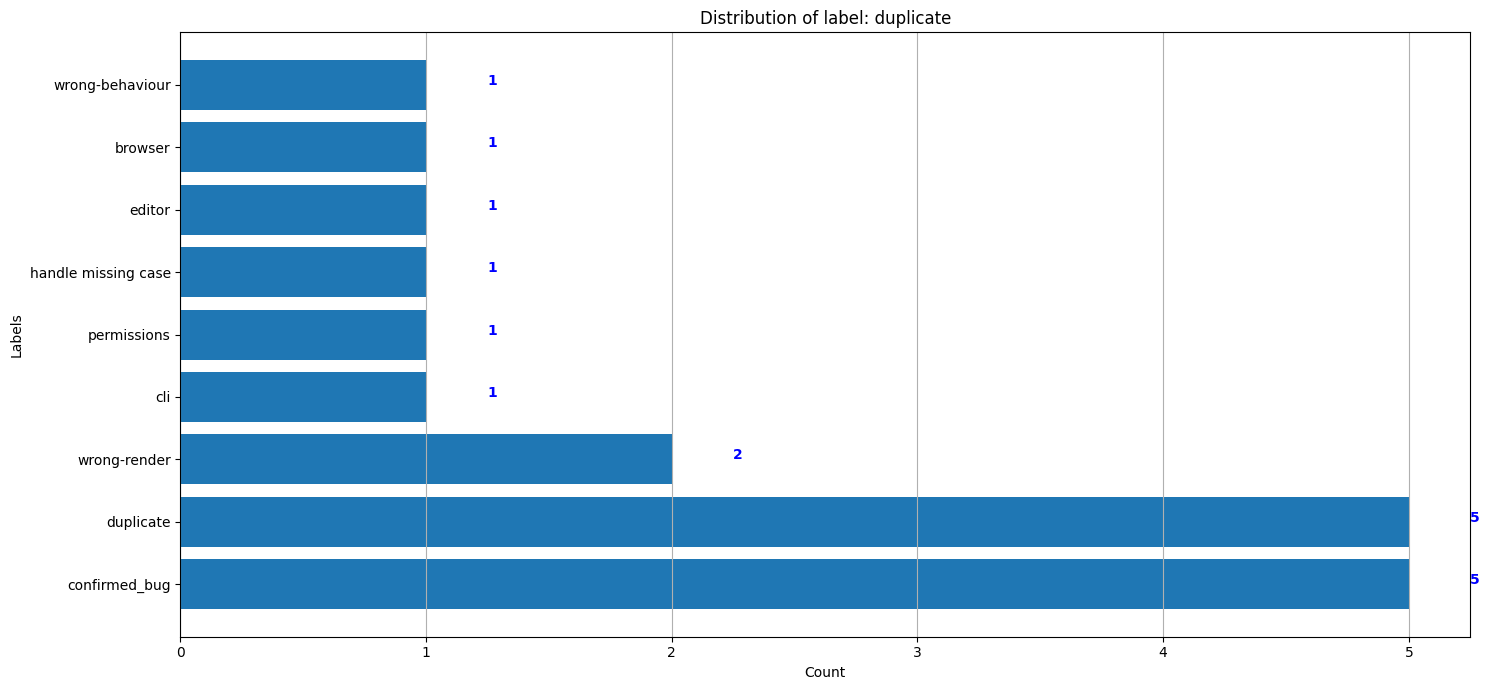

In [75]:
analyse_single_label("duplicate")

# Data Integrity checks


In [79]:
all_annotations = []
for user in users:
    dir_name = f"./data/splits/{user}"
    with open(f"{dir_name}/annotations.json", "r") as f:
        annotations = json.load(f)
        all_annotations.extend(annotations)

# Confirmed bugs but not have version
no_version = []
# Confirmed bugs but not have commit_id
no_commit_id = []
for annotation in all_annotations:
    labels = annotation["annotations"]
    commit_id = annotation.get("commit_id", "")
    version = annotation.get("version", "")
    issue_id = annotation.get("issue_id", "")

    if "confirmed_bug" in labels and not version:
        no_version.append(issue_id)

    if "confirmed_bug" in labels and not commit_id:
        no_commit_id.append(issue_id)

print(f"{len(no_commit_id)=} {len(no_version)=}")

len(no_commit_id)=29 len(no_version)=8


# Events analysis


Unique IDs: 2628
Total records: 2628
Records with commit_id: 387
['https://github.com/PrestaShop/PrestaShop/issues/38456', 'https://github.com/PrestaShop/PrestaShop/issues/38448', 'https://github.com/PrestaShop/PrestaShop/issues/38122', 'https://github.com/PrestaShop/PrestaShop/issues/37652', 'https://github.com/PrestaShop/PrestaShop/issues/37532', 'https://github.com/PrestaShop/PrestaShop/issues/37320', 'https://github.com/PrestaShop/PrestaShop/issues/36401', 'https://github.com/PrestaShop/PrestaShop/issues/36097', 'https://github.com/PrestaShop/PrestaShop/issues/36012', 'https://github.com/PrestaShop/PrestaShop/issues/36010']
Not closed records: 460
['https://github.com/PrestaShop/PrestaShop/issues/39107', 'https://github.com/PrestaShop/PrestaShop/issues/38402', 'https://github.com/PrestaShop/PrestaShop/issues/38139', 'https://github.com/PrestaShop/PrestaShop/issues/38134', 'https://github.com/PrestaShop/PrestaShop/issues/38123', 'https://github.com/PrestaShop/PrestaShop/issues/38122

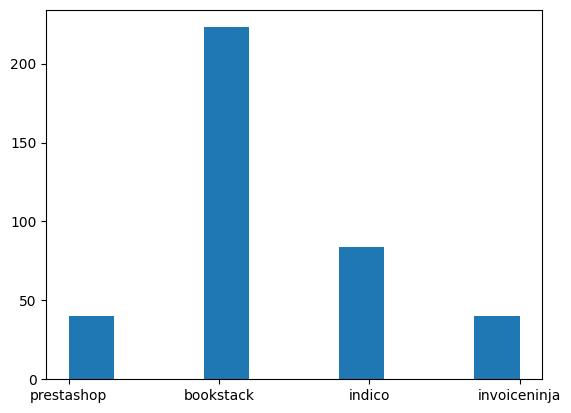

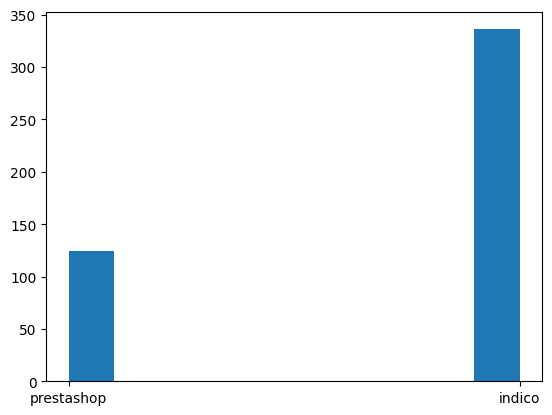

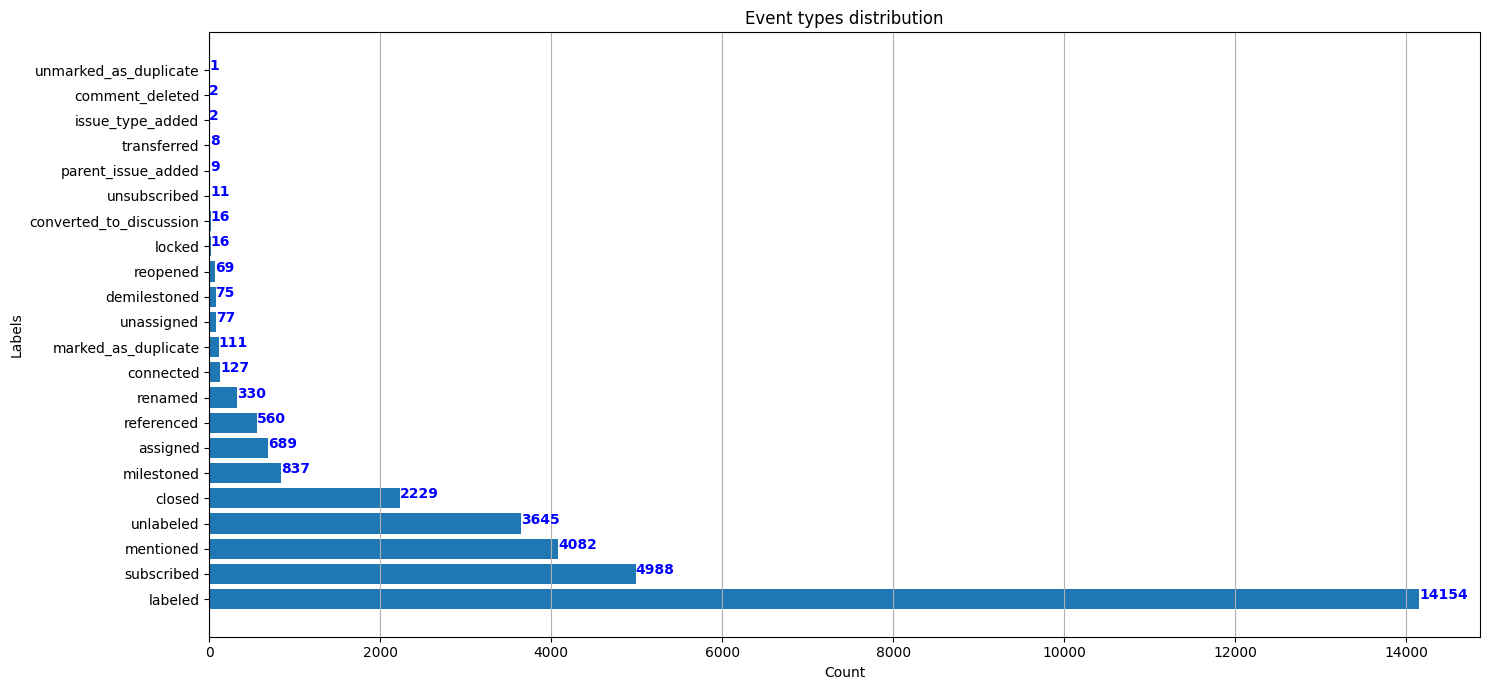

In [ ]:
import json
from matplotlib import pyplot as plt

with open("./data/original/events.json", "r") as f:
    all_events = json.load(f)

ids = set(map(lambda x: x["id"], all_events))
print("Unique IDs:", len(ids))
print("Total records:", len(all_events))

with_commits = []
event_types = []
not_closed = []
number_of_commits = 0
for row in all_events:
    events = row.get("events", [])
    if not events:
        continue

    event_types += [x.get("event", "unknown") for x in events]

    if not any([x for x in events if x.get("event", "") == "closed"]):
        not_closed.append(row["id"])

    number_of_commits += sum(1 for x in events if x.get("commit_id", ""))

    if any([x for x in events if x.get("commit_id", "")]):
        with_commits.append(row["id"])

print("Records with commit_id:", len(with_commits))
print(with_commits[:10])
print("Not closed records:", len(not_closed))
print(not_closed[:10])
print("Total commits:", number_of_commits)


def extract_app_from_url(url: str) -> str:
    url = url.lower()
    if "bookstack" in url:
        return "bookstack"
    elif "indico" in url:
        return "indico"
    elif "invoiceninja" in url:
        return "invoiceninja"
    elif "prestashop" in url:
        return "prestashop"
    else:
        return "unknown"


plt.hist([extract_app_from_url(x) for x in with_commits], label="With commits")
plt.figure()
plt.hist([extract_app_from_url(x) for x in not_closed], label="Not closed")
plot_annotation_distribution(event_types, "Event types distribution")


# Create a filtered list with only the ones either a PR or has commit_id.
def filter_for_app(app: str):
    app = app.lower()
    filtered = []
    for row in all_events:
        url = row.get("url", "").lower()
        events = row.get("events", [])
        if not events:
            continue

        if app in url and (
            any([x for x in events if x.get("commit_id", "")])
            or any([x for x in events if x.get("event", "") == "pull_request"])
        ):
            filtered.append(row)

    print(f"Filtered for {app}: {len(filtered)} records")
    return filtered